<a href="https://colab.research.google.com/github/Ferperezm28/AccionesGoogle_Bedu/blob/main/Predicci%C3%B3n_de_precio_de_acciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de Predicción de acciones con Ciencia de datos de la empresa Google

**Integrantes del Equipo:**


*   Elemento de la lista
*   Fernanda Perez - a.ferp71@gmail.com



**Introducción:**

Este análisis tiene como objetivo examinar la evolución de las acciones de Google en los últimos 15 años(2009-2024) con el propósito de identificar patrones y tendencias. A través de este estudio, buscamos construir un modelo de regresión lineal simple utilizando datos históricos para prever posibles movimientos futuros en el precio de las acciones.
Este análisis es crucial para inversores, gestores de fondos y analistas que buscan tomar decisiones informadas en el mercado financiero. Al comprender a fondo los factores que han influido en el rendimiento pasado de las acciones de Google, esperamos proporcionar información valiosa para la toma de decisiones estratégicas y la planificación financiera.

**Origen de los Datos:**

Los datos han sido extraídos de Yahoo Finance, una plataforma líder en información financiera. Se obtuvieron registros históricos de las acciones de Google en formato CSV facilitando su manipulación y análisis,  abarcando un período de los últimos 15 años hasta la fecha de extracción.

Recursos: [Yahoo Finance](https://finance.yahoo.com/)

**Identificar el problema**
* Se puede predecir el valor de las acciones con base en sus datos históricos y determinar la confiabilidad de la empresa, en base a esto.

Preguntas:
1. ¿Existe una periodicidad en el precio de las acciones? (encontrar patrones en alzas o baja de la acciones, presentes cada año en cierto período de tiempo -cada verano)
2. ¿El valor promedio al que cierra una acción es determinante en su valor futuro del próximo mes?
3. ¿Cómo ha cambiado el precio de las acciones a lo largo del tiempo?
4. ¿Cuándo se presentan más movimientos en las acciones? ¿Estos dependen del precio de las acciones?
5. ¿Cuál es el mejor día para invertir?
6. ¿Existe un período de tiempo más adecuado para invetir? por ejemplo donde el precio sea bajo y este solo crezca.
7. ¿Podemos identificar períodos de crisis o recesión de la empresa mediante el precio de sus acciones?
8. ¿Cuál sería el valor de las acciones en 5, 10 y 20 años, de acuerdo con los datos históricos?

# Dataset

Importación de paquetes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos nuestros datos

In [35]:
data=pd.read_csv('https://raw.githubusercontent.com/Ferperezm28/AccionesGoogle_Bedu/main/Datasets/GOOGL.csv', sep=',')

*Informacion sobre el dataset*

In [ ]:
#Cantidad de datos
data.shape

(3774, 7)

Observemos que tenemos 3774 registros y 7 filas, para ver un poco de qué se trata el dataset utilizemos head()

In [ ]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-02-02,8.365616,8.633634,8.308308,8.522773,8.522773,208067724
1,2009-02-03,8.572823,8.583584,8.354104,8.519770,8.519770,261997740
2,2009-02-04,8.510260,8.869870,8.487738,8.583584,8.583584,272423304
3,2009-02-05,8.531281,8.893393,8.433433,8.851852,8.851852,290285424
4,2009-02-06,8.920420,9.354605,8.894895,9.291291,9.291291,281242476


**Variables Disponibles:**

* Date: Representa la fecha en la que se registraron los datos de la acción.

* Open: Este valor indica el precio de apertura de la acción en el mercado en la fecha específica.

* High: El valor más alto que alcanzó la acción durante el día de negociación.

* Low: El valor más bajo que alcanzó la acción durante el día de negociación.

* Close: El precio de cierre de las acciones en el día.

* Adj Close (Adjusted Close): El precio de cierre ajustado por eventos corporativos como dividendos o divisiones de acciones.

* Volume: El volumen de acciones negociadas en el día.

In [ ]:
data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
3769,2024-01-24,148.539993,149.850006,148.100006,148.699997,148.699997,25233500
3770,2024-01-25,150.070007,153.050003,149.539993,151.869995,151.869995,29149100
3771,2024-01-26,151.100006,152.539993,151.009995,152.190002,152.190002,26101000
3772,2024-01-29,152.059998,153.779999,151.429993,153.509995,153.509995,27784300
3773,2024-01-30,152.800003,153.619995,151.190002,151.460007,151.460007,36331800


In [ ]:
#obtenemos mas informacion sobre las columnas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3774 non-null   object 
 1   Open       3774 non-null   float64
 2   High       3774 non-null   float64
 3   Low        3774 non-null   float64
 4   Close      3774 non-null   float64
 5   Adj Close  3774 non-null   float64
 6   Volume     3774 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 206.5+ KB


In [ ]:
#identificar valores nulos
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

No tenemos valores nulos en nuestro dataset, por lo que no es necesario realizar una limpieza en el documento, dado que cada columna contiene los mismos 3774 valores y ninguno esta vacio.

*EDA*

In [ ]:
#Columnas
data.columns
#el dataset nos proporciona una columna categorica(date), y el resto de columnas numericas
#estas columnas identifican correctamente la informacion que contienen

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
#Analisis probabilistico de las varaibles numericas
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3.774000e+03
mean,51.926982,52.465381,51.399807,51.946740,51.946740,6.267376e+07
std,39.706664,40.170557,39.274628,39.731477,39.731477,5.266703e+07
min,7.463714,7.671922,7.243493,7.279530,7.279530,9.312000e+06
25%,17.474037,17.616803,17.227854,17.443694,17.443694,2.883370e+07
50%,39.006248,39.295749,38.645001,38.955250,38.955250,4.166500e+07
75%,71.308752,72.059252,70.383252,71.209751,71.209751,8.284307e+07
max,152.800003,153.779999,151.429993,153.509995,153.509995,5.923990e+08


In [3]:
#La columna Date, almacena tres valores(dia, mes, año), tiene formato type-object
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [4]:
#porcentaje de crecimiento
def crecimiento(row):
  close = row['Close']
  open = row['Open']
  aumento = close - open
  porcentaje = aumento / open
  return porcentaje
data['Porcentaje'] = data.apply(crecimiento, axis=1)
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Porcentaje
0,2009-02-02,8.365616,8.633634,8.308308,8.522773,8.522773,208067724,0.018786
1,2009-02-03,8.572823,8.583584,8.354104,8.519770,8.519770,261997740,-0.006189
2,2009-02-04,8.510260,8.869870,8.487738,8.583584,8.583584,272423304,0.008616
3,2009-02-05,8.531281,8.893393,8.433433,8.851852,8.851852,290285424,0.037576
4,2009-02-06,8.920420,9.354605,8.894895,9.291291,9.291291,281242476,0.041576


# Estimados de locación:

La media, mediana, moda y desviación estandar proporcionan información sobre el centro de la distribución de los datos. Ayudan a entender dónde se concentran los valores y si hay asimetrías o sesgos en la distribución, A continuación se analizara las columnas Open y Close:





In [ ]:
#Open
mediaO = data['Open'].mean()
medianaO = data['Open'].median()
modaO = data['Open'].mode().iloc[0]
desvO= data['Open'].std()
rango_intercuartilico = data['Open'].quantile(0.75) - data['Open'].quantile(0.25)

print("OPEN: Valor en el que abrieron las acciones (USD)")
print(f"Media: ${mediaO}")
print(f"Mediana: ${medianaO}")
print(f"Moda: ${modaO}")
print(f"Desviación Estándar: {desvO}")
print(f"Rango intercuartílico: {rango_intercuartilico}")

OPEN: Valor en el que abrieron las acciones (USD)
Media: $51.926982479332274
Mediana: $39.0062485
Moda: $14.089089
Desviación Estándar: 39.706664240754264
Rango intercuartílico: 53.834715249999995


In [ ]:
#close
media = data['Close'].mean()
mediana = data['Close'].median()
moda = data['Close'].mode().iloc[0]
desv= data['Close'].std()
rango_intercuartilico = data['Close'].quantile(0.75) - data['Close'].quantile(0.25)

print("CLOSE: Valor en el que cerraron las acciones (USD)")
print(f"Media: ${media}")
print(f"Mediana: ${mediana}")
print(f"Moda: ${moda}")
print(f"Desviación Estándar: {desv}")
print(f"Rango intercuartílico: {rango_intercuartilico}")


CLOSE: Valor en el que cerraron las acciones (USD)
Media: $51.94674019395866
Mediana: $38.95525
Moda: $14.514515
Desviación Estándar: 39.73147732089713
Rango intercuartílico: 53.766057249999996


 Los datos parecen tener una distribución sesgada hacia valores más bajos, como sugiere la moda y las medias más bajas en comparación con las medianas. La alta desviación estándar y el amplio rango intercuartílico indican un gran cambio en los precios de apertura y cierre. Es posible que haya eventos atípicos o condiciones del mercado que contribuyan a esta variabilidad. Ahora analizemoslos con Boxplots y con media truncada:

In [ ]:
from scipy.stats import trim_mean

In [ ]:
media_truncada= trim_mean(data['Open'],0.1)
print(f"Media truncada: {media_truncada}")

Media truncada: 46.54810992682119


In [ ]:
media_truncada= trim_mean(data['Close'],0.1)
print(f"Media truncada: {media_truncada}")

Media truncada: 46.57548796291391


*Visualizacion - Distribuciones*

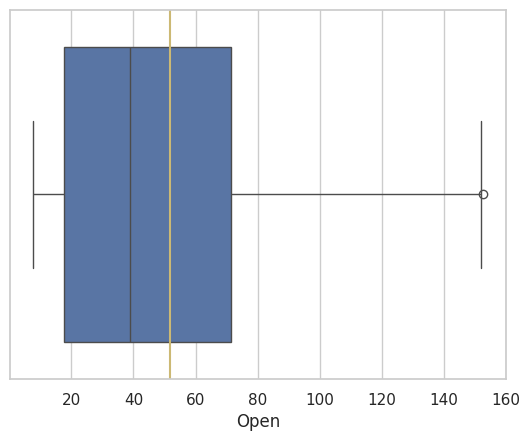

In [ ]:
# Grafica de la columna Open, con la linea de la media para comparar con la mediana
sns.set(style="whitegrid")
sns.boxplot(x=data['Open'])
plt.axvline(data['Open'].mean(), c= 'y')


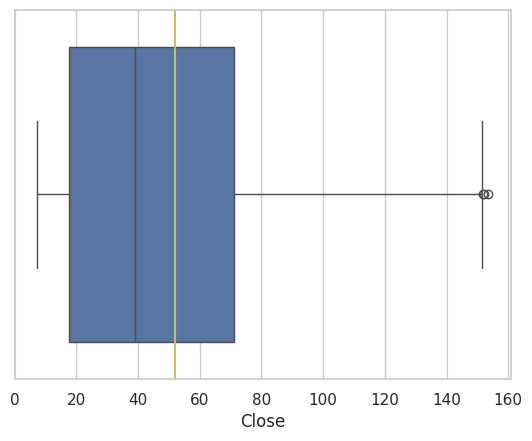

In [ ]:
# Grafica de la columna Close, con la linea de la media para comparar con la mediana
sns.set(style="whitegrid")
sns.boxplot(x=data['Close'])
plt.axvline(data['Close'].mean(), c= 'y')

Debido a que observamos valores atipicos, vamos a realizar un filtrado de datos:

In [ ]:
q1 = data['Open'].quantile(0.25)
q2 = data['Open'].quantile(0.75)
iqr = q2 - q1

limite_inferior = q1 - 3 * iqr
limite_superior = q2 + 3 * iqr

df_filtrado_open = data[(data['Open'] >= limite_inferior) & (data['Open'] <= limite_superior)]

q3_close = data['Close'].quantile(0.25)
q4_close = data['Close'].quantile(0.75)
iqr_close = q4_close - q3_close

limite_inferior_close = q3_close - 3 * iqr_close
limite_superior_close = q4_close + 3 * iqr_close

df_filtrado_close = data[(data['Close'] >= limite_inferior) & (data['Close'] <= limite_superior)]

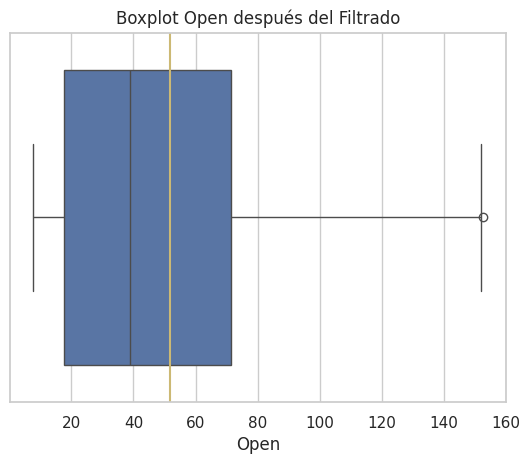

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=df_filtrado_open['Open'])
plt.axvline(df_filtrado_open['Open'].mean(), c= 'y')
plt.title('Boxplot Open después del Filtrado')

plt.show()

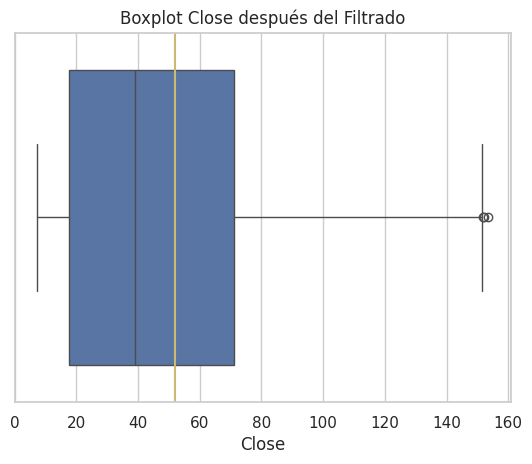

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=df_filtrado_close['Close'])
plt.title('Boxplot Close después del Filtrado')
plt.axvline(df_filtrado_close['Close'].mean(), c= 'y')

plt.show()

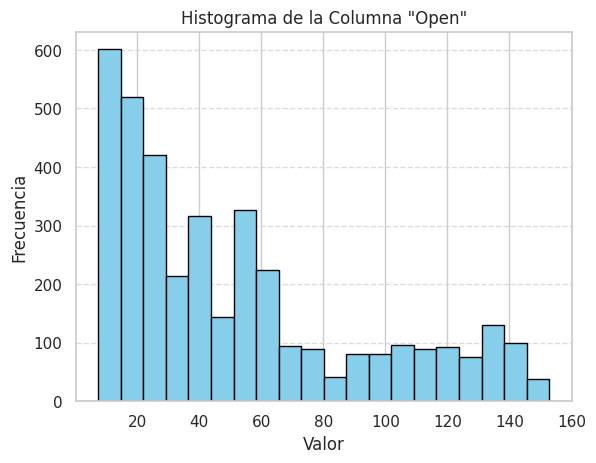

In [ ]:
data['Open'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')

plt.title('Histograma de la Columna "Open"')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

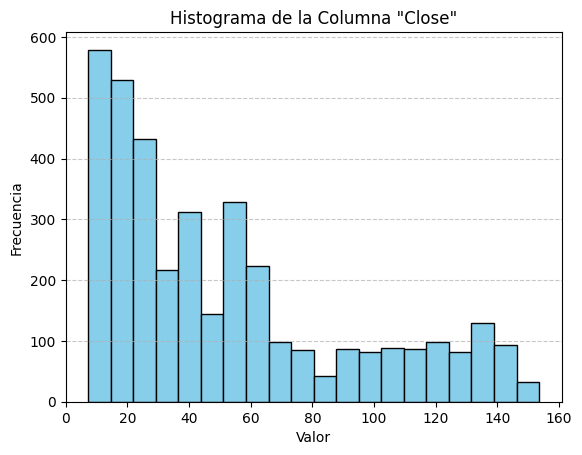

In [ ]:
data['Close'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')

plt.title('Histograma de la Columna "Close"')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
#ambos histogramas muestran un asimetria positiva y una curtosis alta, con cola larga
from scipy.stats import skew, kurtosis
skew_open = skew(data['Open'])
kurt_open = kurtosis(data['Open'])
skew_cls = skew(data['Close'])
kurt_cls = kurtosis(data['Close'])
print('Open:')
print('skewness:',skew_open)
print('Kurtosis:',kurt_open)
print('Close:')
print('skewness:',skew_cls)
print('Kurtosis:',kurt_cls)


Open:
skewness: 0.9560205782183312
Kurtosis: -0.2645764052274324
Close:
skewness: 0.9546017611720446
Kurtosis: -0.27082982652799936


In [ ]:
#tabla de frecuencia - open
rango = data['Open']
rangos = data['Open'].max() - data['Open'].min()
print(f'Rango de valor de las acciones a la apertura: ${rangos:,.2f}')

Rango de valor de las acciones a la apertura: $145.34


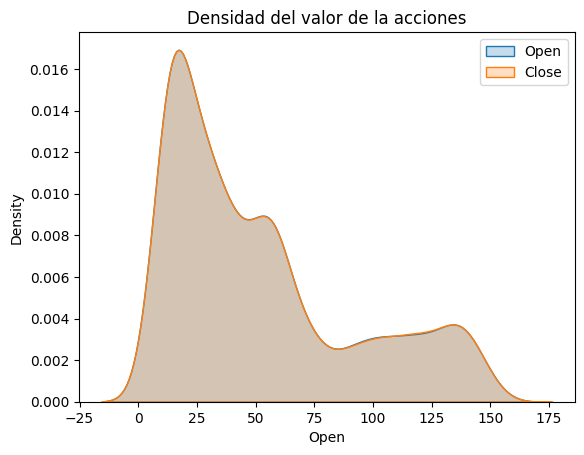

In [ ]:
#grafica de densidad - OPEN
sns.kdeplot(data['Open'], fill=True, label='Open')
sns.kdeplot(data['Close'], fill=True, label='Close')
plt.title('Densidad del valor de la acciones')
plt.legend()
plt.show()


# Analisis Multivariables

In [7]:
#agrupar por años
df_date = data
df_date['Year'] = df_date['Date'].dt.year
df_date['Month'] = df_date['Date'].dt.month
df_date['Day'] = df_date['Date'].dt.day
df_date.head()
#plt.bar(data['Date'],data['Open'])

,Date,Open,High,Low,Close,Adj Close,Volume,Porcentaje,Year,Month,Day
0,2009-02-02,8.365616,8.633634,8.308308,8.522773,8.522773,208067724,0.018786,2009,2,2
1,2009-02-03,8.572823,8.583584,8.354104,8.519770,8.519770,261997740,-0.006189,2009,2,3
2,2009-02-04,8.510260,8.869870,8.487738,8.583584,8.583584,272423304,0.008616,2009,2,4
3,2009-02-05,8.531281,8.893393,8.433433,8.851852,8.851852,290285424,0.037576,2009,2,5
4,2009-02-06,8.920420,9.354605,8.894895,9.291291,9.291291,281242476,0.041576,2009,2,6


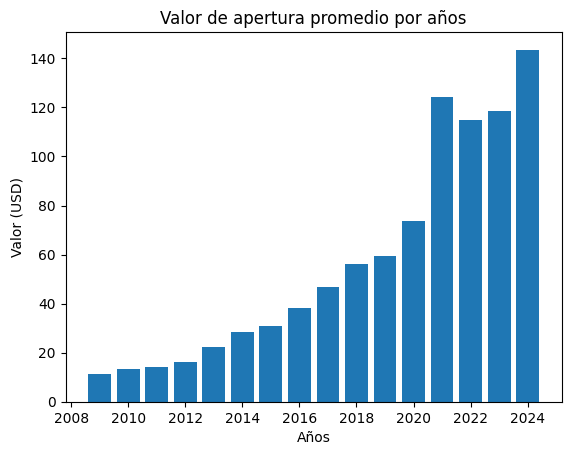

In [12]:
#grafica de barras
#promedio por años
avg_year = df_date.groupby(['Year'])['Open'].mean().reset_index()
plt.bar(avg_year['Year'],avg_year['Open'])
plt.title('Valor de apertura promedio por años')
plt.xlabel('Años')
plt.ylabel('Valor (USD)')
plt.show()

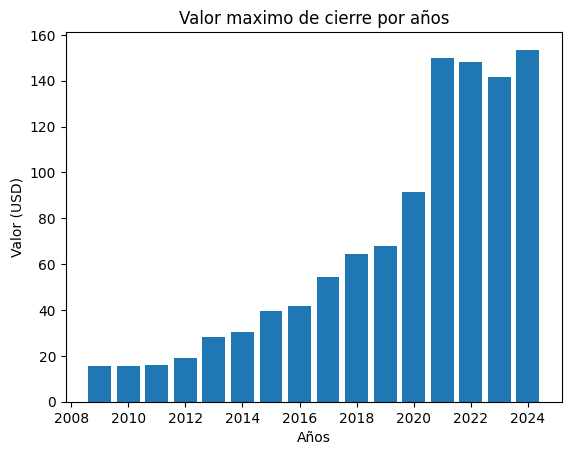

In [14]:
#valor maximo por año
max_year = df_date.groupby(['Year'])['Close'].max().reset_index()
plt.bar(max_year['Year'],max_year['Close'])
plt.title('Valor maximo de cierre por años')
plt.xlabel('Años')
plt.ylabel('Valor (USD)')
plt.show()

<ipython-input-26-dc2f1679ba22>:4: UserWarning: 
The palette list has fewer values (2) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df_date, x='Year', y='High', hue='Year', palette=['blue', 'red'], dodge=False)


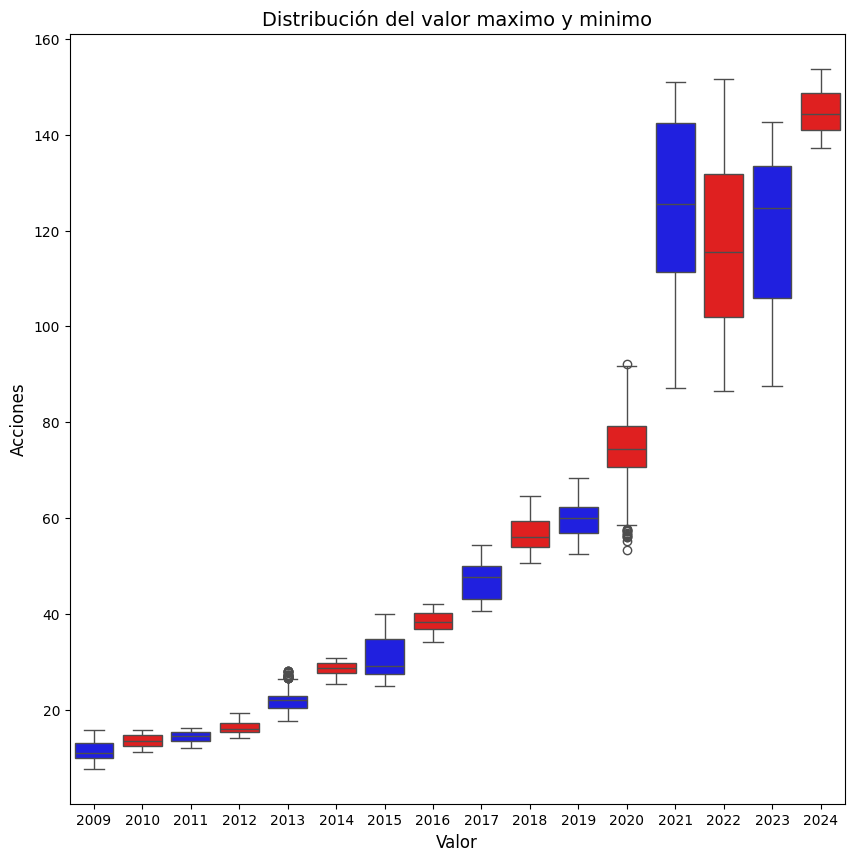

In [26]:
#boxplots
valor_year = df_date.groupby(['Year'])['High']
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_date, x='Year', y='High', hue='Year', palette=['blue', 'red'], dodge=False)

# Omitir la leyenda si no es necesaria
plt.legend([],[], frameon=False)

# Añade un título principal al gráfico
plt.title('Distribución del valor maximo y minimo', fontsize=14)

# Añade títulos a los ejes X e Y
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Acciones', fontsize=12)

plt.show()

In [29]:
year_to_filter = 2023
filtered_data = df_date[df_date['Year'] == year_to_filter]
filtered_data
#valor_month = filtered_data.groupby(['Month'])['Porcentaje']

<ipython-input-31-af89cfa74bf3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Month', y='Porcentaje', data=filtered_data, palette='viridis')


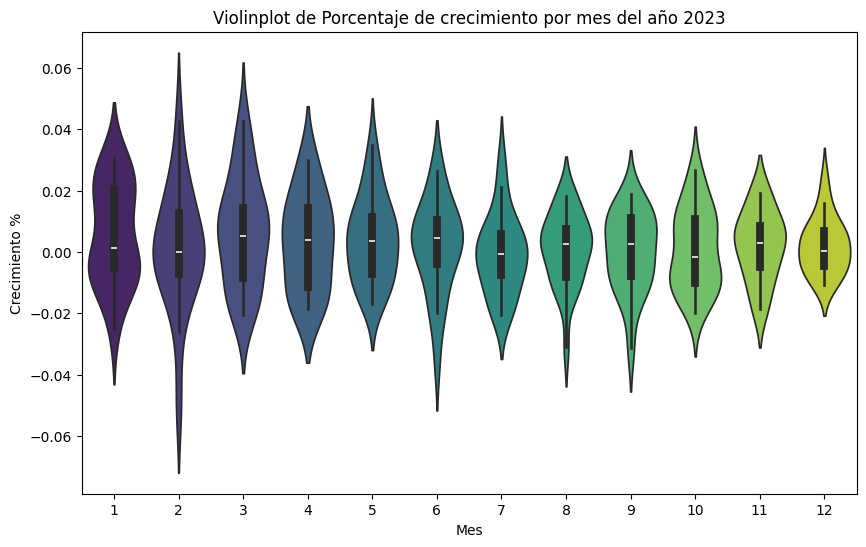

In [31]:
#violinplots
plt.figure(figsize=(10, 6))
sns.violinplot(x='Month', y='Porcentaje', data=filtered_data, palette='viridis')
plt.title('Violinplot de Porcentaje de crecimiento por mes del año 2023')
plt.xlabel('Mes')
plt.ylabel('Crecimiento %')
plt.show()

# Correlaciones

In [ ]:
#matriz de correlaciones
#variables numericas
df_filtered = data.drop(columns=['Date'])
#tabla de correlaciones
df_filtered.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999880,0.999873,0.999725,0.999725,-0.506057
High,0.999880,1.000000,0.999850,0.999873,0.999873,-0.504603
Low,0.999873,0.999850,1.000000,0.999882,0.999882,-0.508090
Close,0.999725,0.999873,0.999882,1.000000,1.000000,-0.506627
Adj Close,0.999725,0.999873,0.999882,1.000000,1.000000,-0.506627
Volume,-0.506057,-0.504603,-0.508090,-0.506627,-0.506627,1.000000


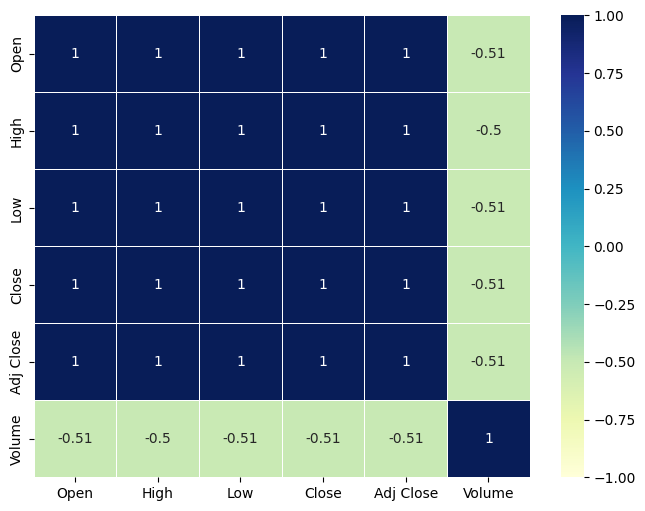

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(df_filtered.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);


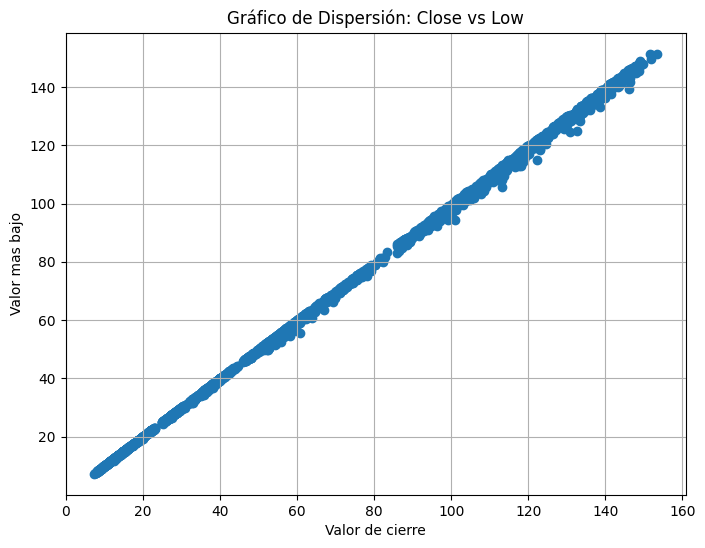

In [ ]:
#Grafico de dispersion - Low -close
plt.figure(figsize=(8, 6))
plt.scatter(df_filtered['Close'], df_filtered['Low'])
plt.xlabel('Valor de cierre')
plt.ylabel('Valor mas bajo')
plt.title('Gráfico de Dispersión: Close vs Low')
plt.grid(True)
plt.show()

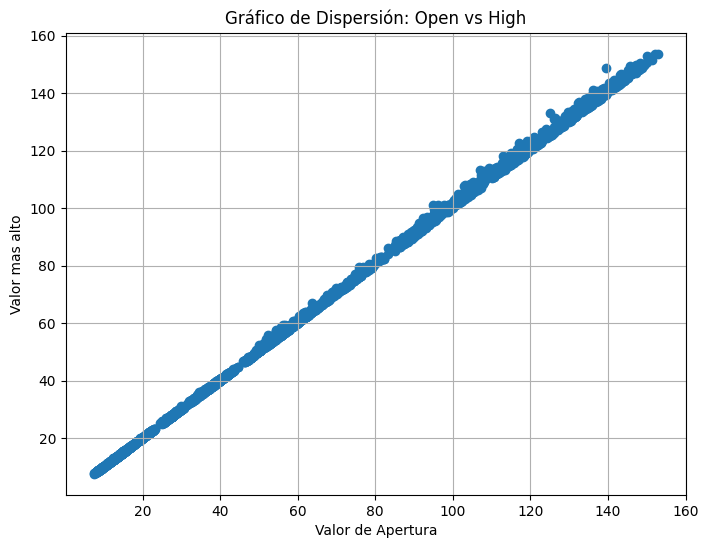

0.9998803032966549


In [ ]:
#Grafico de dispersion High-open
plt.figure(figsize=(8, 6))
plt.scatter(df_filtered['Open'], df_filtered['High'])
plt.xlabel('Valor de Apertura')
plt.ylabel('Valor mas alto')
plt.title('Gráfico de Dispersión: Open vs High')
plt.grid(True)
plt.show()
print(df_filtered['Open'].corr(df_filtered['High']))

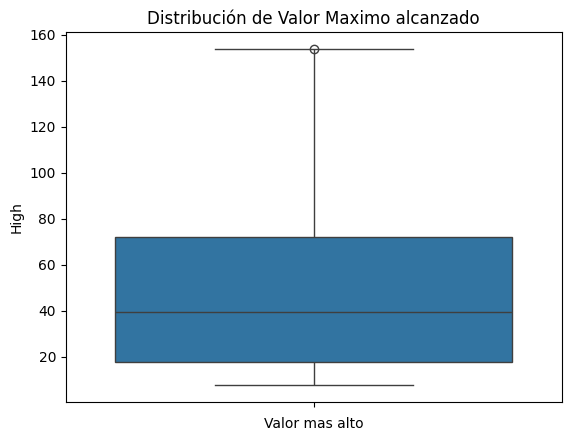

In [ ]:
sns.boxplot( df_filtered['High'])
plt.xlabel('Valor mas alto')
plt.title('Distribución de Valor Maximo alcanzado')
plt.show()

*Regresion lineal*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#Definir variables
X = data['Open']
y = data['High']
#modelo de regresion
lr = LinearRegression()
#valores de prueba
#X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [ ]:
#entrenar modelo
lr.fit(X.to_frame(), y)
#predecir valores
y_predict = lr.predict(X.to_frame())

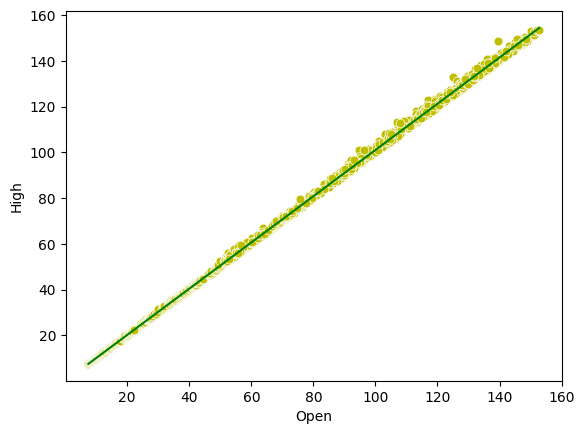

In [ ]:
#graficas resultados
sns.scatterplot(x=data['Open'], y=data['High'], s=40,color ='y');
sns.lineplot(x=data['Open'], y=y_predict, color='g');

In [ ]:
#error
lr.score(X.to_frame(), y)
#.score -
#El método score devuelve el coeficiente de determinación R²
#es una medida de cuánto de la variabilidad en y puede ser explicada por las variables independientes en X a través del modelo.

0.9997606209206109

#Distribuciones Muestrales y Técnicas de Evaluación de Modelos:

## Muestreo aleatorio

In [ ]:
data['High'].sample(n=30, replace=False)

2371     57.495499
1225     27.100601
1886     40.196999
2112     49.025002
3000     87.875000
118      10.765766
1713     38.161499
868      14.312563
535      14.239239
3382    117.998001
2377     60.099499
2268     55.749500
2453     55.441502
448      15.590591
1236     28.040541
266      13.604354
1974     38.525002
649      13.499750
507      15.301301
2283     57.212502
1548     28.203501
2178     47.203999
2980     91.637001
1176     22.374874
3346    116.900002
919      18.769770
2399     63.298500
281      14.224725
3203    142.156006
2846     70.849998
Name: High, dtype: float64

In [ ]:
data['High'].sample(frac=0.1, replace=True)

118      10.765766
2198     49.463001
1956     40.250000
1198     25.835085
2879     77.067001
           ...    
2764     71.829002
698      15.234735
1156     22.019018
3703    140.720001
2798     57.273499
Name: High, Length: 377, dtype: float64

###Bootstrap

In [ ]:
High = data['High']
mean = []

for i in range(3774):
  sample = High.sample(n=50, replace=True)
  mean.append(sample.mean())
  if i < 10:
    print(mean)
  serie_means = pd.Series(mean)

[52.35706472000001]
[52.35706472000001, 47.5921651]
[52.35706472000001, 47.5921651, 62.525988420000004]
[52.35706472000001, 47.5921651, 62.525988420000004, 49.06397624]
[52.35706472000001, 47.5921651, 62.525988420000004, 49.06397624, 53.901443560000004]
[52.35706472000001, 47.5921651, 62.525988420000004, 49.06397624, 53.901443560000004, 55.39298393999999]
[52.35706472000001, 47.5921651, 62.525988420000004, 49.06397624, 53.901443560000004, 55.39298393999999, 51.587188399999995]
[52.35706472000001, 47.5921651, 62.525988420000004, 49.06397624, 53.901443560000004, 55.39298393999999, 51.587188399999995, 51.711904340000004]
[52.35706472000001, 47.5921651, 62.525988420000004, 49.06397624, 53.901443560000004, 55.39298393999999, 51.587188399999995, 51.711904340000004, 53.13784621999999]
[52.35706472000001, 47.5921651, 62.525988420000004, 49.06397624, 53.901443560000004, 55.39298393999999, 51.587188399999995, 51.711904340000004, 53.13784621999999, 56.146517679999995]


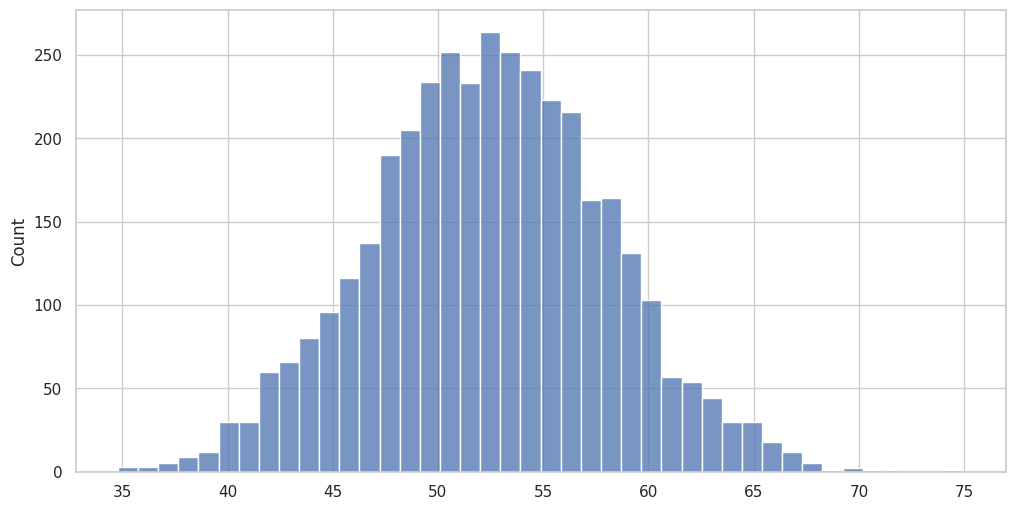

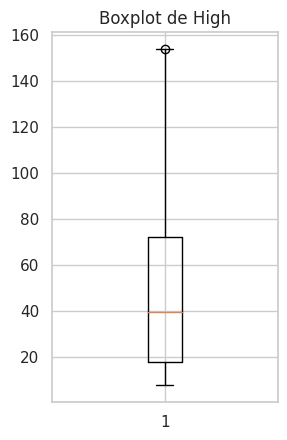

In [ ]:
##Crea un histograma
plt.figure(figsize=(12, 6))
sns.histplot(serie_means, kde=False)
plt.show()

plt.subplot(1, 2, 2)
plt.boxplot(data['High'])
plt.title('Boxplot de High')
plt.show()


Una vez realizada esta práctica, podemos observar que nuestros datos tienen una probabilidad promedio de que su valor más alto ronde entre los 50 y 60

In [ ]:
# Función para realizar bootstrap y obtener estadística de interés
def bootstrap_statistics(data, statistic, num_resamples, resample_size):
    resamples = [data.sample(n=resample_size, replace=True) for _ in range(num_resamples)]
    return [statistic(resample) for resample in resamples]

# a) Bootstrap con remuestreos de tamaño 5
resamples_a = bootstrap_statistics(data['High'], np.mean, 1000, 5)

# b) Bootstrap con remuestreos del 20% del tamaño original
resamples_b = bootstrap_statistics(data['High'], np.mean, 1000, int(0.2 * len(data)))

# c) Bootstrap con remuestreos del 90% del tamaño original
resamples_c = bootstrap_statistics(data['High'], np.mean, 1000, int(0.9 * len(data)))

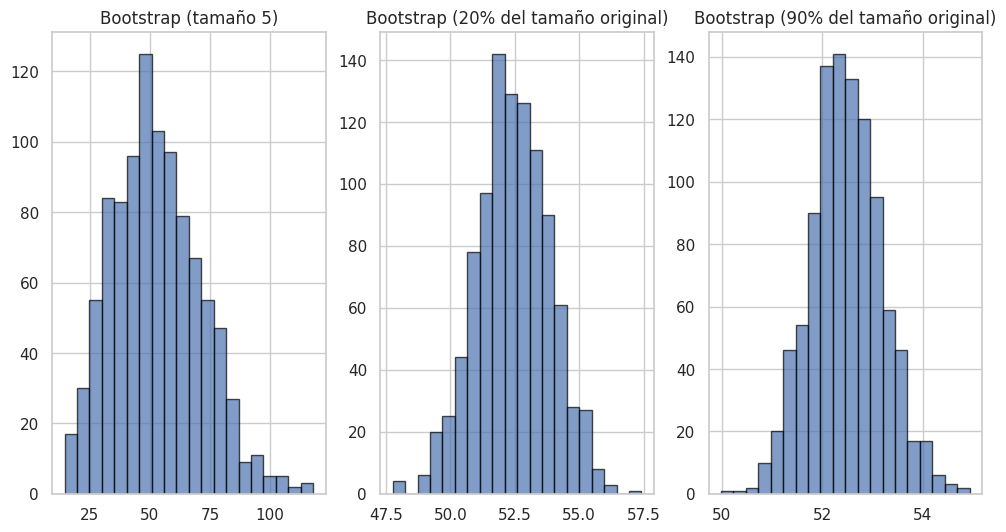

In [ ]:
# Graficar histogramas de los resultados de bootstrap
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(resamples_a, bins=20, edgecolor='black', alpha=0.7)
plt.title('Bootstrap (tamaño 5)')

plt.subplot(1, 3, 2)
plt.hist(resamples_b, bins=20, edgecolor='black', alpha=0.7)
plt.title('Bootstrap (20% del tamaño original)')

plt.subplot(1, 3, 3)
plt.hist(resamples_c, bins=20, edgecolor='black', alpha=0.7)
plt.title('Bootstrap (90% del tamaño original)')

plt.show()

In [ ]:
##Asimetria
serie_means.skew()

0.08968036063157298

In [ ]:
##Curtosis
serie_means.kurtosis()

0.02560634259729566

Podemos concluir que las muesras aleatorias realizadas se comportan de manera normal.

## Error estándar

Con está practica se podra observar que tan separados o sesgados se encuentran nuestros datos.

In [ ]:
High = data['High']
means = []

for i in range(3774):
  sample = High.sample(n=50, replace=True)
  means.append(sample.mean())

  serie_means= pd.Series(means)

In [ ]:
print(f'Error estandar: {serie_means.std()}')

Error estandar: 5.7123547324029955


In [ ]:
print(f'Valor mínimo: {serie_means.min()}')
print(f'Valor máximo: {serie_means.max()}')
print(f'Rango: {serie_means.max() - serie_means.min()}')

Valor mínimo: 31.402427000000003
Valor máximo: 72.58947006
Rango: 41.18704305999999


<Axes: >

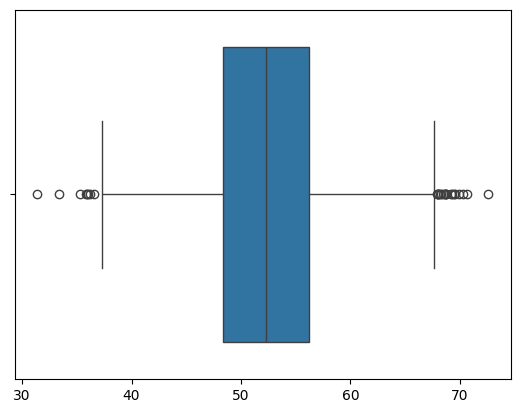

In [ ]:
sns.boxplot(serie_means,orient= 'h')

Podemos visualizar que la mayoria de los datos se encuentran entre 48 y 57.


# Visualizaciones avanzadas

In [32]:
#Crecimiento mayor por mes
crec_max = df_date.groupby(['Year','Month'])['Porcentaje'].max().reset_index()
crec_max

,Year,Month,Porcentaje
0,2009,2,0.043593
1,2009,3,0.047348
2,2009,4,0.033778
3,2009,5,0.031662
4,2009,6,0.028138
...,...,...,...
175,2023,9,0.019023
176,2023,10,0.026640
177,2023,11,0.019183
178,2023,12,0.023901


In [33]:
#Treemaps
import plotly.express as px
fig = px.treemap(crec_max, path=['Year', 'Month'], values='Porcentaje')

fig.show()

In [43]:
year_to_filter = 2023
filtered_data = df_date[df_date['Year'] == year_to_filter]
ano23 = filtered_data[['Open','Close','Month']]
ano23

,Open,Close,Month
3504,89.589996,89.120003,1
3505,90.349998,88.080002,1
3506,87.470001,86.199997,1
3507,86.790001,87.339996,1
3508,88.360001,88.019997,1
...,...,...,...
3749,140.770004,141.490005,12
3750,141.589996,141.520004,12
3751,141.589996,140.369995,12
3752,140.779999,140.229996,12


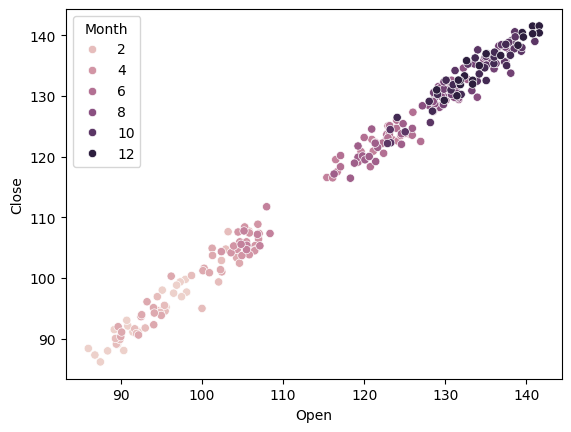

In [45]:
#sccaterplot
sns.scatterplot(x=ano23['Open'], y=ano23['Close'], hue=ano23['Month']);

In [47]:
ano23 = df_date[df_date['Year']==2010]
ano10 = df_date[df_date['Year']==2023]

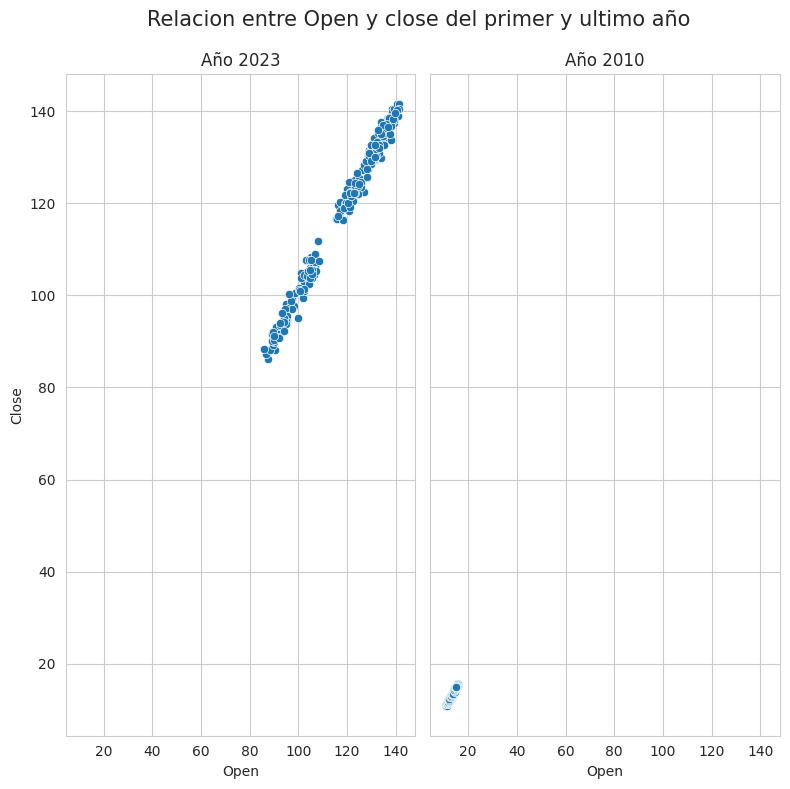

In [52]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(8, 8))
axes = fig.subplots(1, 2, sharex=True, sharey=True)

sns.scatterplot(x=ano10['Open'], y=ano10['Close'], ax=axes[0])
sns.scatterplot(x=ano23['Open'], y=ano23['Close'], ax=axes[1])

axes[0].set_title('Año 2023')
axes[1].set_title('Año 2010')

fig.suptitle('Relacion entre Open y close del primer y ultimo año', fontsize=15, x=0.53)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

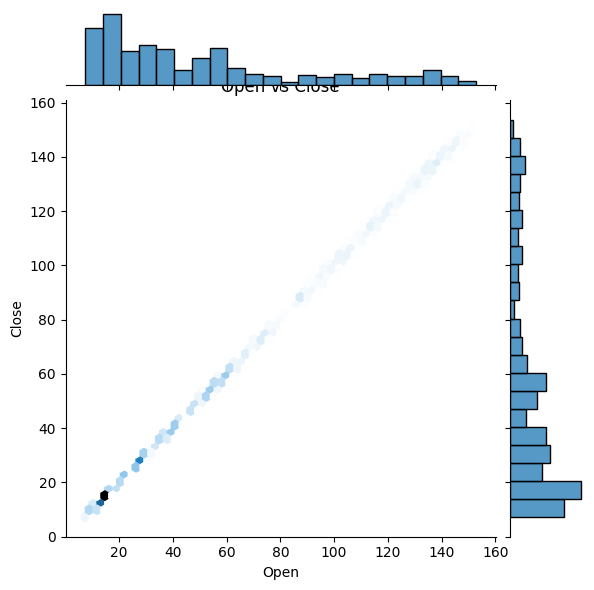

In [42]:
#binning hexagonal
sns.jointplot(x='Open', y='Close', data=data, kind='hex', ratio=5, joint_kws={'gridsize': 50})
plt.title('Open vs Close')
plt.show()